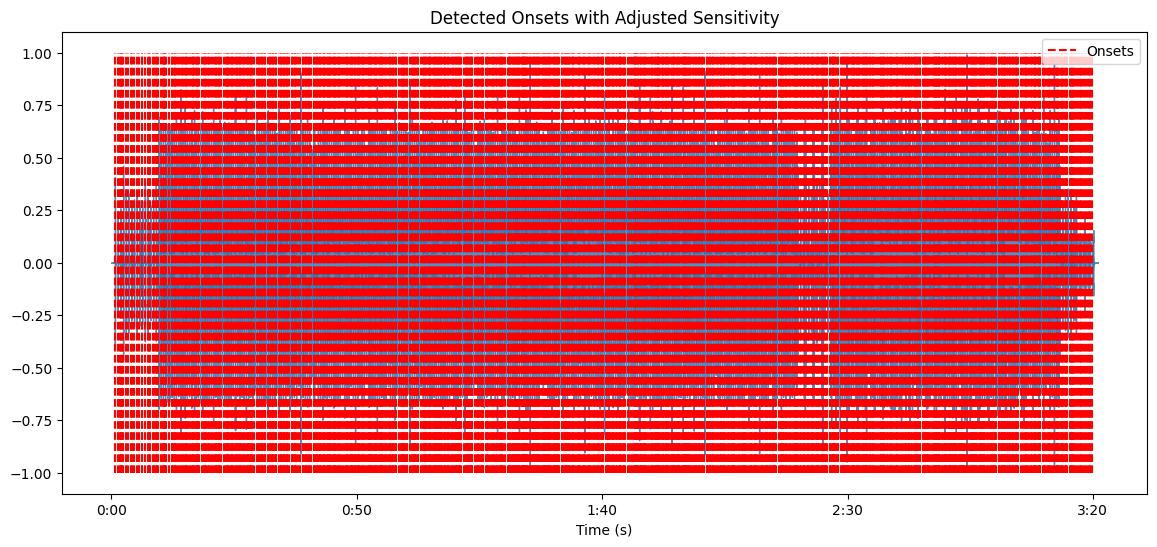

Onset times (in seconds): [  0.69079365   1.24807256   1.78213152   1.86920635   2.20589569
   2.36263039   2.91410431   3.47138322   3.9938322    4.10412698
   4.58594104   5.14321995   5.70049887   6.23455782   6.33324263
   6.79764172   7.36653061   7.5755102    7.91800454   8.47528345
   8.57977324   9.03256236   9.35183673   9.58403628  10.03102041
  10.47800454  10.70439909  10.81469388  10.91918367  11.22104308
  11.80154195  12.25433107  12.37043084  12.70131519  12.92770975
  13.14829932  13.47337868  14.0306576   14.47183673  14.59954649
  14.93043084  15.15102041  15.36        15.73732426  16.25977324
  16.5384127   16.70675737  16.78802721  17.14793651  17.38013605
  17.59492063  17.93741497  18.47727891  18.93006803  19.0461678
  19.36544218  19.6092517   19.8124263   20.20716553  20.70639456
  21.15337868  21.24045351  21.60036281  21.83256236  22.018322
  22.38403628  22.9355102   23.38249433  23.4985941   23.81786848
  24.05587302  24.2706576   24.60734694  24.68281179 

In [5]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import requests

# Download the file to a local path
audio_url = 'https://github.com/egorpol/beat_it/raw/refs/heads/main/examples/Tekonivel_Voimamies.aif'
local_audio_path = 'Tekonivel_Voimamies.aif'

# Download the file
response = requests.get(audio_url)
with open(local_audio_path, 'wb') as f:
    f.write(response.content)

# Define the hop length globally
hop_length = 128

# Load the audio file
y, sr = librosa.load(local_audio_path)

# Onset detection with custom sensitivity
onset_frames = librosa.onset.onset_detect(y=y, sr=sr,
                                          delta=0.1,       # Lower value for more sensitivity (default is 0.07)
                                          backtrack=True,   # Enable backtracking to improve onset timing
                                          pre_max=10,       # Increase to be less sensitive to nearby peaks
                                          post_max=10,      # Increase for less sensitivity to nearby peaks
                                          hop_length=hop_length)  # Use global hop length

# Convert onset frames to times
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)  # Use global hop length

# Plot the waveform and onset times
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets')
plt.title('Detected Onsets with Adjusted Sensitivity')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# Print the onset times
print('Onset times (in seconds):', onset_times)


In [6]:
import numpy as np

iois = np.diff(onset_times)

print(iois)

[0.55727891 0.53405896 0.08707483 0.33668934 0.15673469 0.55147392
 0.55727891 0.52244898 0.11029478 0.48181406 0.55727891 0.55727891
 0.53405896 0.09868481 0.46439909 0.56888889 0.20897959 0.34249433
 0.55727891 0.1044898  0.45278912 0.31927438 0.23219955 0.44698413
 0.44698413 0.22639456 0.11029478 0.1044898  0.30185941 0.58049887
 0.45278912 0.11609977 0.33088435 0.22639456 0.22058957 0.32507937
 0.55727891 0.44117914 0.12770975 0.33088435 0.22058957 0.20897959
 0.37732426 0.52244898 0.27863946 0.16834467 0.08126984 0.3599093
 0.23219955 0.21478458 0.34249433 0.53986395 0.45278912 0.11609977
 0.31927438 0.24380952 0.2031746  0.39473923 0.49922902 0.44698413
 0.08707483 0.3599093  0.23219955 0.18575964 0.36571429 0.55147392
 0.44698413 0.11609977 0.31927438 0.23800454 0.21478458 0.33668934
 0.07546485 0.47600907 0.45278912 0.07546485 0.3599093  0.23219955
 0.21478458 0.34249433 0.08126984 0.4585941  0.45278912 0.08707483
 0.3599093  0.23219955 0.19736961 0.43537415 0.47020408 0.44117

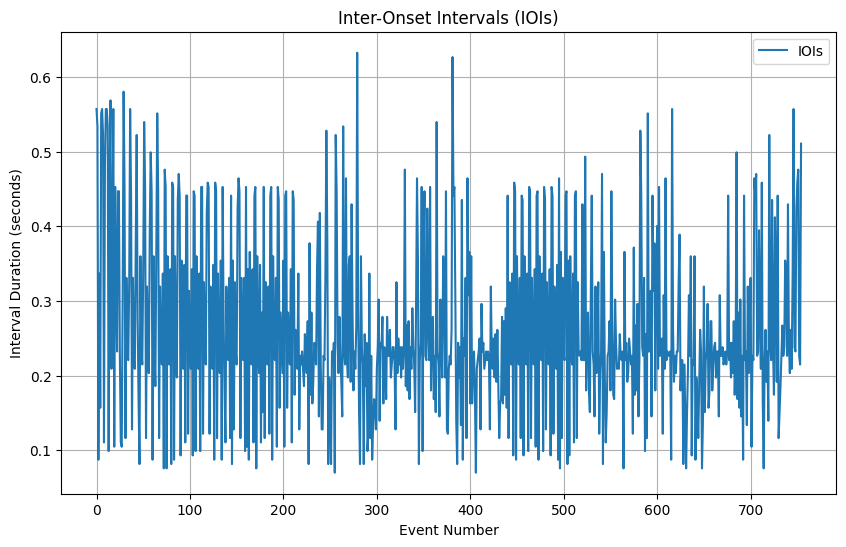

Mean IOI (Average Interval Duration): 0.2637848357886201
Standard Deviation of IOIs: 0.11928910092813773
Coefficient of Variation of IOIs: 0.4522212225411176


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the IOIs
plt.figure(figsize=(10, 6))
plt.plot(iois, label="IOIs")
plt.title('Inter-Onset Intervals (IOIs)')
plt.xlabel('Event Number')
plt.ylabel('Interval Duration (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate standard deviation and coefficient of variation
mean_ioi = np.mean(iois)
std_ioi = np.std(iois)
cv_ioi = std_ioi / mean_ioi  # Coefficient of variation

# Print out results with descriptions
print("Mean IOI (Average Interval Duration):", mean_ioi)
print("Standard Deviation of IOIs:", std_ioi)
print("Coefficient of Variation of IOIs:", cv_ioi)


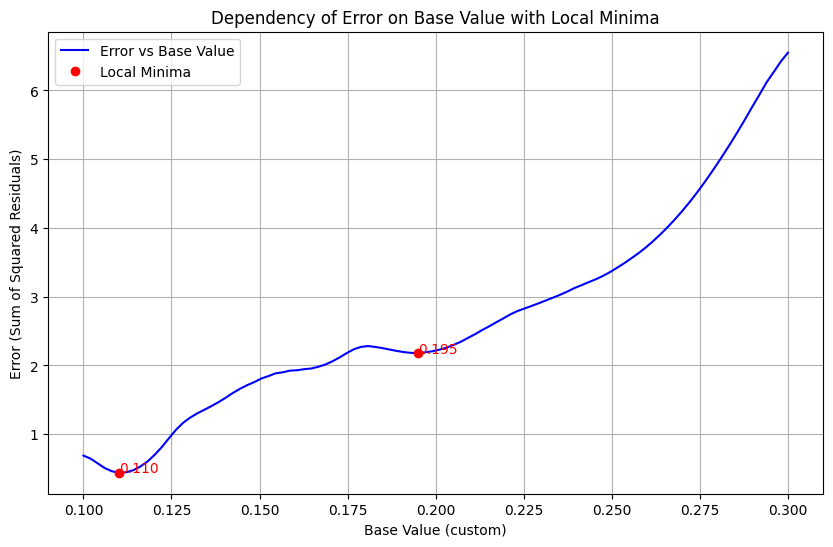

Local minima (base values) and corresponding errors:
Base Value: 0.11010, Error: 0.44058
Base Value: 0.19495, Error: 2.18151


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace with actual data)
data = iois

# Define a range of base values to explore
base_values = np.linspace(0.1, 0.3, 100)  # Adjust range if needed

# Initialize an empty list to store the errors
errors = []

# Loop through different base values and compute the error for each
for base_value_custom in base_values:
    # Calculate multipliers and reconstructed data
    multipliers = np.round(data / base_value_custom)
    reconstructed_data = base_value_custom * multipliers

    # Calculate the residuals and error (sum of squared residuals)
    residuals = data - reconstructed_data
    error = np.sum(residuals**2)

    # Append the error to the list
    errors.append(error)

# Convert errors to a numpy array for further processing
errors = np.array(errors)

# Find local minima (by finding peaks of the negative error array)
minima_indices, _ = find_peaks(-errors)

# Plotting the dependency of the error on the base_value_custom
plt.figure(figsize=(10, 6))
plt.plot(base_values, errors, label='Error vs Base Value', color='blue')

# Mark the local minima
plt.plot(base_values[minima_indices], errors[minima_indices], 'ro', label='Local Minima')

# Annotate the local minima on the plot
for idx in minima_indices:
    plt.text(base_values[idx], errors[idx], f'{base_values[idx]:.3f}', color='red')

plt.title('Dependency of Error on Base Value with Local Minima')
plt.xlabel('Base Value (custom)')
plt.ylabel('Error (Sum of Squared Residuals)')
plt.grid(True)
plt.legend()
plt.show()

# Print out the local minima values
print("Local minima (base values) and corresponding errors:")
for idx in minima_indices:
    print(f"Base Value: {base_values[idx]:.5f}, Error: {errors[idx]:.5f}")


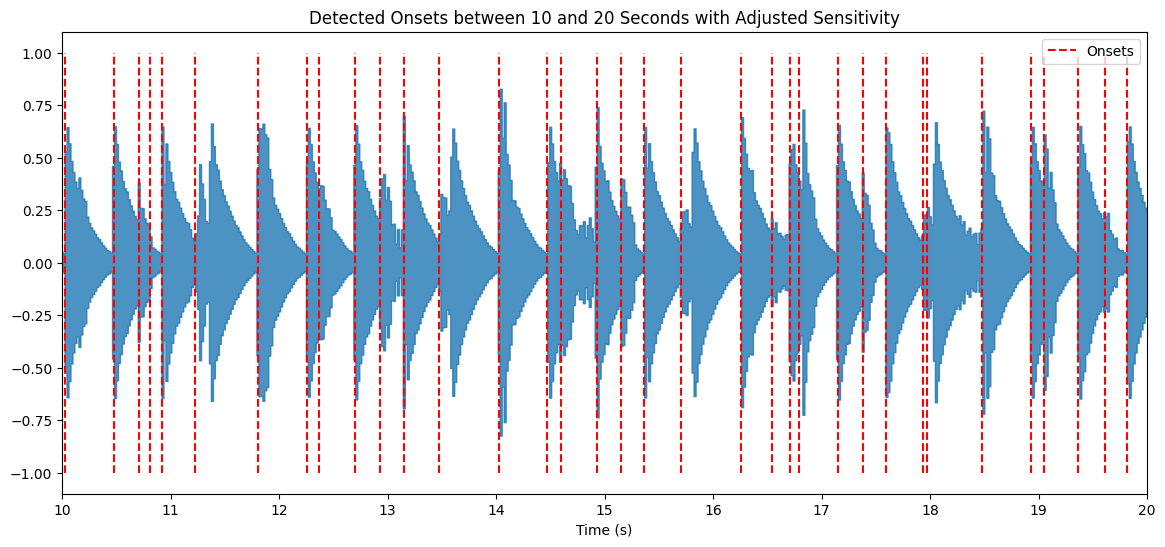

Onset times between 10 and 20 seconds (in seconds): [10.03102041 10.47800454 10.70439909 10.81469388 10.91918367 11.22104308
 11.80154195 12.25433107 12.37043084 12.70131519 12.92770975 13.14829932
 13.47337868 14.0306576  14.47183673 14.59954649 14.93043084 15.15102041
 15.36       15.70829932 16.25977324 16.5384127  16.70675737 16.78802721
 17.14793651 17.38013605 17.59492063 17.93741497 17.9722449  18.47727891
 18.93006803 19.0461678  19.36544218 19.6092517  19.8124263 ]


In [10]:
# Define the hop length globally
hop_length = 128

# Load the audio file
y, sr = librosa.load(local_audio_path)

# Onset detection with custom sensitivity
onset_frames = librosa.onset.onset_detect(
    y=y,
    sr=sr,
    delta=0.1,          # Lower value for more sensitivity (default is 0.07)
    backtrack=True,     # Enable backtracking to improve onset timing
    pre_max=1,         # Increase to be less sensitive to nearby peaks
    post_max=1,        # Increase for less sensitivity to nearby peaks
    hop_length=hop_length  # Use global hop length
)

# Convert onset frames to times
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

# Define the time interval in seconds
start_time = 10  # Start at 10 seconds
end_time = 20    # End at 20 seconds

# Filter onset times within the specified interval
onset_times_segment = onset_times[(onset_times >= start_time) & (onset_times <= end_time)]

# Plot the waveform and onset times within the interval
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.8)

# Set the x-axis limits to the desired interval
plt.xlim(start_time, end_time)

# Plot vertical lines for the filtered onset times
plt.vlines(onset_times_segment, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets')

plt.title('Detected Onsets between 10 and 20 Seconds with Adjusted Sensitivity')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

# Print the onset times within the specified interval
print('Onset times between 10 and 20 seconds (in seconds):', onset_times_segment)

In [3]:
import pandas as pd

# Create a DataFrame
df_seq = pd.DataFrame({"onset_times": onset_times})


# Define the file path
file_path = 'tekonivel_onsets_librosa_unfiltered.csv'

# Save the DataFrame to a CSV file
df_seq.to_csv(file_path, index=False)

# Print the dynamic message
print(f"Sequence has been saved to '{file_path}'")

Sequence has been saved to 'tekonivel_onsets_librosa_unfiltered.csv'


In [11]:
import numpy as np

# Desired interval and tolerance
interval = 0.56    # Desired interval in seconds
tolerance = 0.1   # Tolerance in seconds

# Build a directed acyclic graph (DAG) where nodes are onset times
edges = {t: [] for t in onset_times}

# Construct edges between onset times that are approximately 'interval' apart
for i in range(len(onset_times)):
    for j in range(i + 1, len(onset_times)):
        delta_t = onset_times[j] - onset_times[i]
        if abs(delta_t - interval) <= tolerance:
            edges[onset_times[i]].append(onset_times[j])

# Function to find the longest path starting from a given node
def find_longest_path(node, edges, memo):
    if node in memo:
        return memo[node]
    max_length = 1
    max_path = [node]
    for neighbor in edges[node]:
        path = find_longest_path(neighbor, edges, memo)
        if 1 + len(path) > max_length:
            max_length = 1 + len(path)
            max_path = [node] + path
    memo[node] = max_path
    return max_path

# Find all longest sequences in the DAG
memo = {}
longest_length = 0
longest_paths = []

for node in onset_times:
    path = find_longest_path(node, edges, memo)
    if len(path) > longest_length:
        longest_length = len(path)
        longest_paths = [path]
    elif len(path) == longest_length:
        longest_paths.append(path)

# Output all sequences that have the longest length
for idx, path in enumerate(longest_paths):
    print(f"Sequence {idx + 1}:")
    print(np.array(path))


Sequence 1:
[38.49868481 39.07337868 39.6306576  40.18793651 40.73360544 41.29668934
 41.85396825 42.41124717 42.95111111 43.52       44.07727891 44.62875283
 45.18603175 45.74911565 46.30639456 46.94494331 47.4093424  47.9724263
 48.52970522 49.08117914 49.63265306 50.16671202 50.75301587 51.31029478
 51.86176871 52.39002268 52.98213152 53.53360544 54.07927438 54.64816327
 55.20544218 55.73950113 56.30258503 56.84244898 57.42875283 57.98022676
 58.53750567 59.12961451 59.65786848 60.21514739 60.76081633 61.36453515
 61.88117914 62.43845805 62.99573696 63.60526077 64.09868481 64.64435374
 65.21324263 65.84018141 66.32780045 66.80380952 67.43655329 68.07510204
 68.5569161  69.07356009 69.66566893 70.2984127  70.78022676 71.33750567
 71.86575964 72.33015873]
